# Tabular Playground Series - Feb 2022

## Importación de librerías a utilizar

In [1]:
import zipfile
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generación de DataFrame
### Primero descargo la información directo desde la API de Kaggle, la descomprimo y borro el zip original

In [2]:
conda install -c conda-forge kaggle

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Entrar a la consola y correr $kaggle$. Esto creará la carpeta .kaggle en C:\Users\user\, donde se debe copiar el arcivo token (.json) que se obtiene de la subsección API en Account dentro del usuario propio de kaggle.

In [3]:
file = pathlib.Path("datasets/2022_02/train.csv")
if file.exists():
    print('Files already exists')
else:
    print('Creating the file')
    !kaggle competitions files -c tabular-playground-series-feb-2022
    !kaggle competitions download -c tabular-playground-series-feb-2022
    with zipfile.ZipFile("tabular-playground-series-feb-2022.zip", "r") as zip_ref:
        zip_ref.extractall(r"C:\Users\alanp\Data Science\kaggle_tabular_playground\datasets\2022_02")
    os.remove("tabular-playground-series-feb-2022.zip")

Files already exists


### Genero el DataFrame

In [4]:
train_df = pd.read_csv("datasets/2022_02/train.csv", index_col='row_id')
test_df = pd.read_csv("datasets/2022_02/test.csv", index_col='row_id')

## Chequeo rápido de estructura y datos

In [5]:
print(train_df.shape)
print(test_df.shape)

(200000, 287)
(100000, 286)


In [6]:
train_df['target'].unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

In [7]:
train_df.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


### Chequeo de NaN values en las columnas

In [8]:
train_df.isna().sum().value_counts()

0    287
dtype: int64

No hay valores faltantes

### Chequeo de outliers y eliminación de filas con algún outlier (zscore >= 3)

In [9]:
train_df_labels = train_df.pop('target')

In [10]:
from scipy import stats
train_df = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]

In [11]:
train_df.shape

(122623, 286)

In [12]:
train_df_labels = train_df_labels[train_df.index]

In [13]:
train_df_labels.shape

(122623,)

In [14]:
train_df['target'] = train_df_labels

### chequeo desbalance en cantidad de targets en train_df 

In [24]:
train_df.groupby('target')['target'].count()

target
Bacteroides_fragilis        12544
Campylobacter_jejuni        11138
Enterococcus_hirae          12471
Escherichia_coli            12465
Escherichia_fergusonii      12574
Klebsiella_pneumoniae       10550
Salmonella_enterica         11825
Staphylococcus_aureus       12859
Streptococcus_pneumoniae    13036
Streptococcus_pyogenes      13161
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='target'>

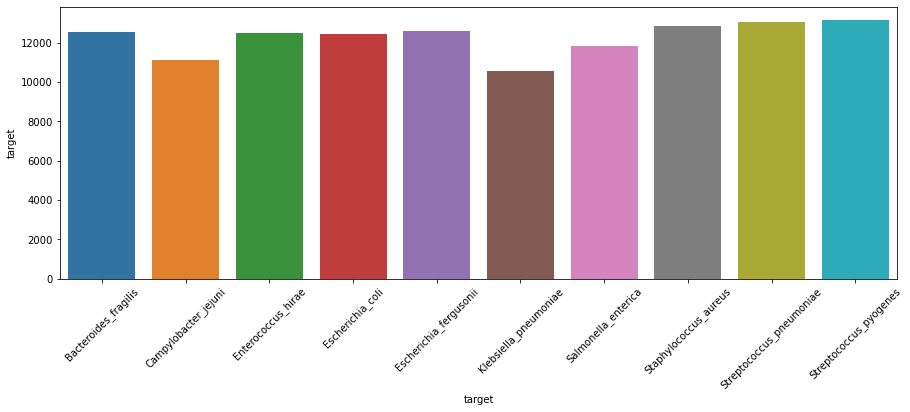

In [31]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x=train_df.groupby('target')['target'].count().index, y=train_df.groupby('target')['target'].count())

Las diez bacterias tienen cantidad similar de entradas, por lo que considero que no está desbalanceado y puedo utilizar los datos como están